# NumPy vs CuPy (CPU vs GPU) Performance Benchmarks
This notebook investigates the performance improvements between the numpy and cupy libraries. The hardware used is state of the art components from top vendors. To test on your own hardware, you can either use the Jupyter Notebook (.ipynb) file, assuming cupy is correctly installed. Or try on Google CoLab (be sure to have a runtime with an NVIDIA GPU).

##  Local Development Hardware:
**CPU:** Intel Core i9-11700K <br>
**GPU:** NVIDIA Geforce RTX 3090 <br>

<a target="_blank" href="https://colab.research.google.com/github/dotimothy/AccelerationMethods/blob/main/NumpyVsCupy.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>  

## Dependencies

In [1]:
# CoLab Check. If In CoLab then install some dependencies.
IN_COLAB = True
try:
  import google.colab
except:
  IN_COLAB = False
  print(f'In CoLab: {IN_COLAB}')

if(IN_COLAB):
    !curl -O https://raw.githubusercontent.com/dotimothy/AccelerationMethods/main/requirements.txt 
!pip install -r requirements.txt

In [2]:
# Importing Libraries
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
import time
import cpuinfo
import GPUtil

## Experiment

In [8]:
# Logistic Functions
def getCPUName():
    return cpuinfo.get_cpu_info()['brand_raw']

def getGPUName():
    gpus = GPUtil.getGPUs()
    return gpus[0].name

# Benchmarking Functions
def numpyBench(sz=5000,avgIt=1):
    cpuTime = []
    for it in range(avgIt):
      # Main Computation
      a = np.random.rand(sz,sz)
      start = time.time()
      b = np.matmul(a,a)
      cpuTime.append(time.time()-start)
      # Freeing Memory
      del a,b
    return np.mean(cpuTime)

def cupyBench(sz=5000,avgIt=1):
    gpuTime = []
    for it in range(avgIt):
      # Main Computation
      a = cp.random.rand(sz,sz)
      start = time.time()
      b = cp.matmul(a,a)
      gpuTime.append(time.time()-start)
      # Freeing Memory
      del a,b
      cp._default_memory_pool.free_all_blocks()
    return np.mean(gpuTime)

In [4]:
# Getting Hardware Info
cpuName = getCPUName()
gpuName = getGPUName()

# Size of Square Matrix N
szs = [(10**i)+(10**(i))*j for i in range(5) for j in range(9)]
szs = [sz for sz in szs if sz<=(3000 if IN_COLAB else 6000)]

# Empty Lists of Times (Corresponding to szs)
cpuTimes = []
gpuTimes = []

In [5]:
# Benchmark
avgIt = 5 # Smoothing Average for Randomness
for sz in szs:
    cpuTimes.append(numpyBench(sz=sz,avgIt=avgIt))
    gpuTimes.append(cupyBench(sz=sz,avgIt=avgIt))

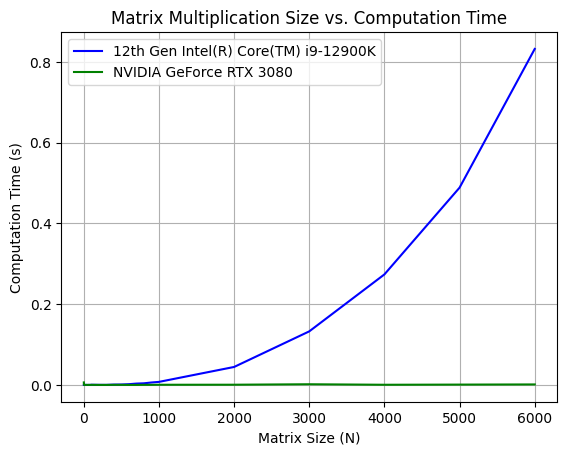

In [6]:
# Plot the Results (Changes each Time)
plt.figure()
plt.plot(szs,cpuTimes,'blue')
plt.plot(szs,gpuTimes,'green')
plt.grid()
xlabel = plt.xlabel('Matrix Size (N)')
ylabel = plt.ylabel('Computation Time (s)')
xscale = plt.xscale('linear')
yscale = plt.yscale('linear')
title = plt.title('Matrix Multiplication Size vs. Computation Time')
legend = plt.legend([cpuName,gpuName])

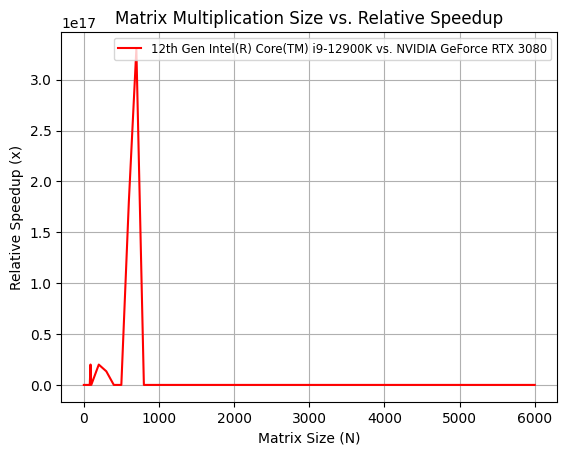

In [10]:
# Plot the Results (Changes each Time)
plt.figure()
np.seterr(all=0)
plt.plot(szs,np.divide(cpuTimes,np,'red')
plt.grid()
xlabel = plt.xlabel('Matrix Size (N)')
ylabel = plt.ylabel('Relative Speedup (x)')
xscale = plt.xscale('linear')
yscale = plt.yscale('linear')
title = plt.title('Matrix Multiplication Size vs. Relative Speedup')
legend = plt.legend([f'{cpuName} vs. {gpuName}'],fontsize='small',loc='upper right')